## Installing packages

In [ ]:
!pip install roboflow -q
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.8/906.8 kB 42.3 MB/s eta 0:00:00


## Download dataset for training from roboflow - [link](https://universe.roboflow.com/mandarin-3xtf3/mandarin-xclmk/dataset/1#)

In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="hb1oLJfjz3orq8nvr0YS")
project = rf.workspace("mandarin-3xtf3").project("mandarin-xclmk")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to mandarin-1 in yolov8:: 100%|██████████| 8640/8640 [00:03<00:00, 2647.72it/s]


## samples from dataset

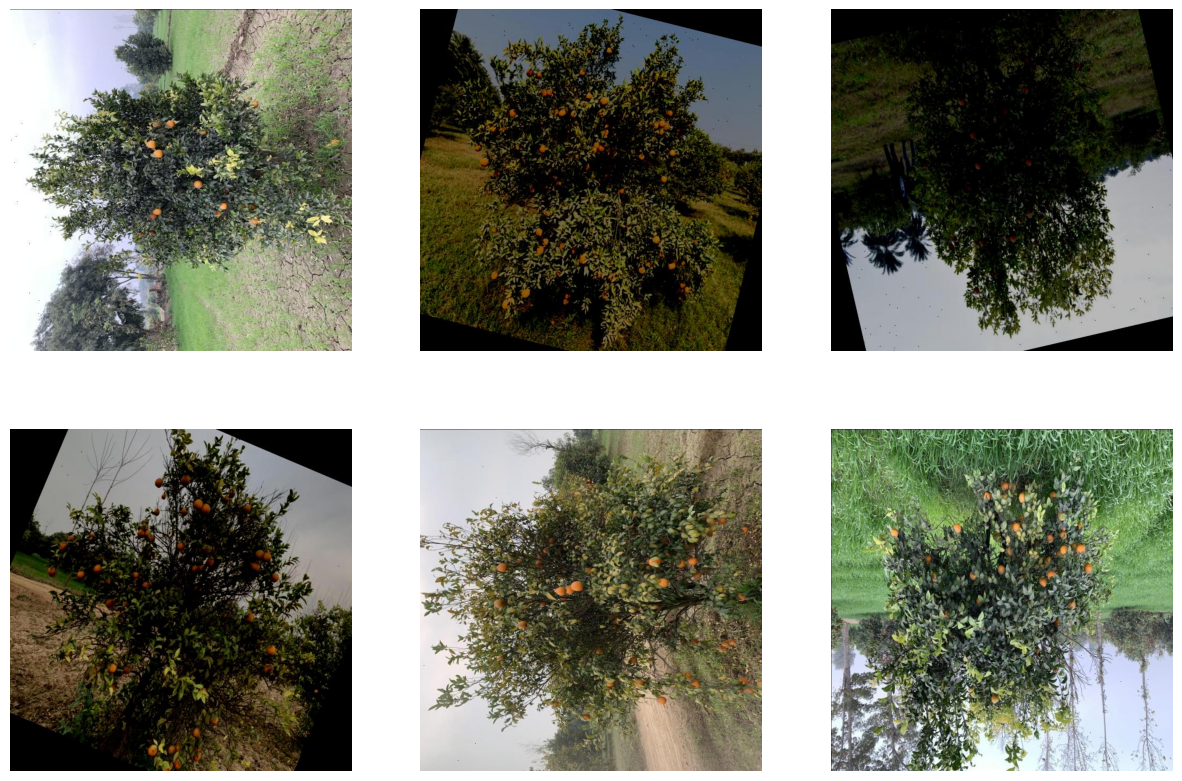

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import cv2

# Path to the image directory
image_dir = '/content/mandarin-1/train/images'

# List all image files in the directory
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

# Randomly select 6 images
random_images = random.sample(image_files, 6)

# Plot the selected images
plt.figure(figsize=(15, 10))
for i, img_name in enumerate(random_images):
    img_path = os.path.join(image_dir, img_name)
    img = cv2.imread(img_path)[..., ::-1]
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    # plt.title(img_name)
    plt.axis('off')

plt.show()

## Download model - yolo object detection


In [3]:
from ultralytics import YOLO

In [ ]:
model = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 278MB/s]


## Training the model

In [ ]:
model.train(data='/content/mandarin-1/data.yaml', epochs=15)

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/mandarin-1/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

train: Scanning /content/mandarin-1/train/labels.cache... 4208 images, 58 backgrounds, 0 corrupt: 100%|██████████| 4208/4208 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/mandarin-1/valid/labels.cache... 56 images, 7 backgrounds, 0 corrupt: 100%|██████████| 56/56 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      6.61G      1.811      1.121      1.011        571        640: 100%|██████████| 263/263 [01:47<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         56        394      0.765      0.626      0.645      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15       6.6G      1.833      1.099      1.017        740        640: 100%|██████████| 263/263 [01:42<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         56        394      0.543      0.533      0.566      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      7.13G      1.782      1.059      1.008        615        640: 100%|██████████| 263/263 [01:38<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         56        394      0.684      0.671      0.629      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      7.48G      1.775      1.026      1.002       1067        640: 100%|██████████| 263/263 [01:41<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all         56        394        0.7      0.736      0.697      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      6.85G      1.733     0.9927     0.9905        753        640: 100%|██████████| 263/263 [01:37<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all         56        394      0.702      0.718      0.714      0.504


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      5.88G      1.708     0.9702      1.018        449        640: 100%|██████████| 263/263 [01:37<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         56        394      0.723      0.726       0.71      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      5.82G      1.676     0.9407      1.003        386        640: 100%|██████████| 263/263 [01:33<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         56        394      0.709      0.674      0.692      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      5.37G      1.626     0.9196      0.996        560        640: 100%|██████████| 263/263 [01:31<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         56        394      0.767      0.731       0.74      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      6.19G      1.598     0.8929     0.9852        600        640: 100%|██████████| 263/263 [01:33<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         56        394      0.776      0.731      0.745       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      6.11G      1.589      0.874     0.9825        646        640: 100%|██████████| 263/263 [01:32<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         56        394       0.78      0.707      0.745       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      5.41G      1.548     0.8526     0.9705        633        640: 100%|██████████| 263/263 [01:37<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         56        394      0.682      0.758      0.757      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15       5.7G      1.534     0.8389     0.9667        514        640: 100%|██████████| 263/263 [01:40<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         56        394      0.746      0.782      0.751      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      5.56G      1.516      0.823     0.9633        474        640: 100%|██████████| 263/263 [01:41<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         56        394      0.754      0.734      0.752        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      5.74G      1.493     0.8097     0.9575        412        640: 100%|██████████| 263/263 [01:38<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         56        394      0.707      0.791      0.748      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      6.19G      1.469     0.7933     0.9535        540        640: 100%|██████████| 263/263 [01:35<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         56        394      0.727      0.771      0.779      0.622



15 epochs completed in 0.418 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]


                   all         56        394      0.726      0.772      0.778       0.62
                 fruit          5          5      0.819        0.8      0.862       0.82
          fruit orange         38         51      0.544      0.804      0.669      0.599
                orange          6        338      0.814      0.711      0.804      0.441
Speed: 0.5ms preprocess, 2.9ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b4c3afae080>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

## Testing model

In [6]:
from google.colab.patches import cv2_imshow
import cv2

In [7]:
# trained model path
model = YOLO('/content/runs/detect/train2/weights/best.pt')

### single image


image 1/1 /content/mandarin-1/test/images/IMG_8762_JPG_jpg.rf.afcbb9661259cda7b324a41c44799b22.jpg: 640x640 84 oranges, 24.7ms
Speed: 3.5ms preprocess, 24.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


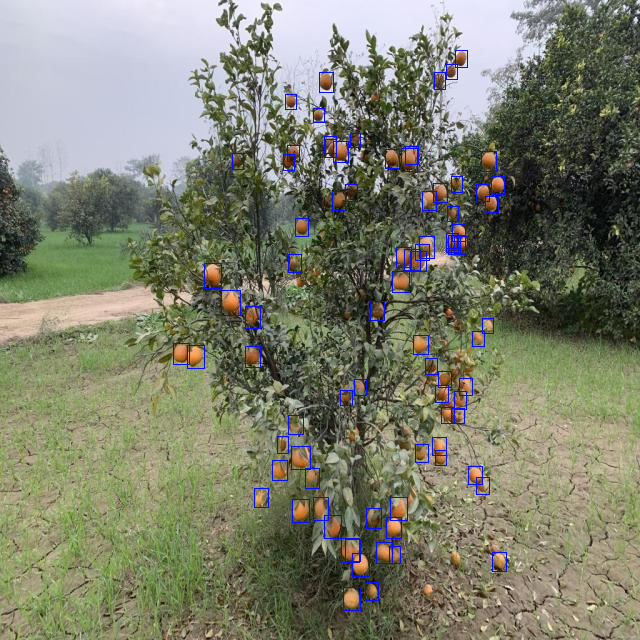

In [21]:
image_path = "/content/mandarin-1/test/images/IMG_8762_JPG_jpg.rf.afcbb9661259cda7b324a41c44799b22.jpg"

results = model.predict(image_path)

img = cv2.imread(image_path)

for box in results[0].boxes:
  class_id = results[0].names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  cv2.rectangle(img, (cords[0],cords[1]), (cords[2],cords[3]), (252, 16, 8), 1)

cv2_imshow(img)

### test folder


image 1/1 /content/mandarin-1/test/images/IMG_8762_JPG_jpg.rf.afcbb9661259cda7b324a41c44799b22.jpg: 640x640 84 oranges, 39.7ms
Speed: 2.6ms preprocess, 39.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/mandarin-1/test/images/p22_JPG_jpg.rf.6e8da18112158bef114323068c8eea25.jpg: 640x640 38 oranges, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/mandarin-1/test/images/IMG_8820_JPG_jpg.rf.a269c506e6cfad01cfdd4937efed8752.jpg: 640x640 11 oranges, 12.3ms
Speed: 2.1ms preprocess, 12.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/mandarin-1/test/images/IMG_8804_JPG_jpg.rf.f85452449b7c37cb400dc97a0b0d4e7c.jpg: 640x640 28 oranges, 12.9ms
Speed: 2.1ms preprocess, 12.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/mandarin-1/test/images/DSC02960_JPG_jpg.rf.7a9149ac4e0fbc648f028119909b2674.jpg: 640x

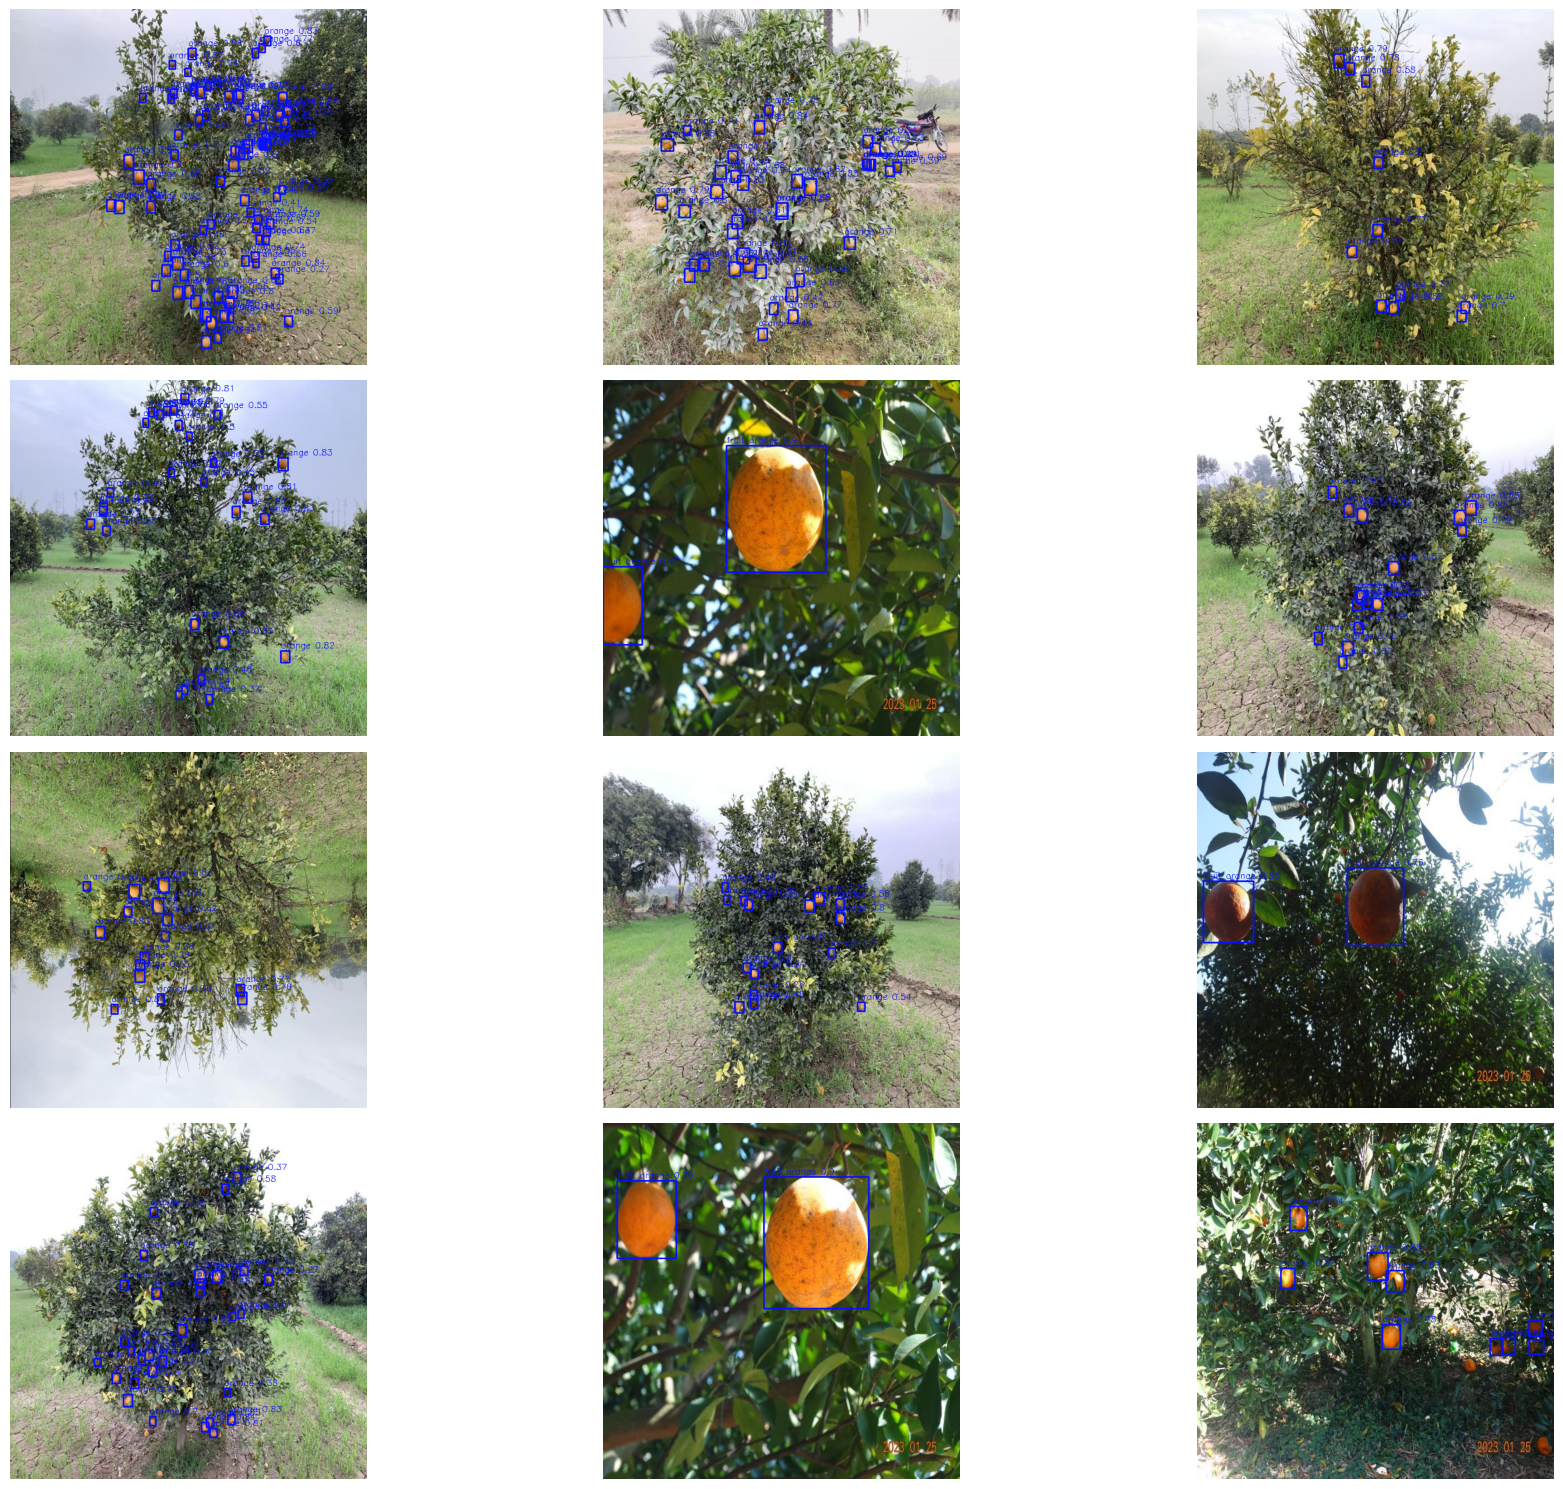

In [32]:
import os
import random
import matplotlib.pyplot as plt


folder_path = "/content/mandarin-1/test/images"
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Number of images to be tested
num_images = 12
selected_images = random.sample(image_files, num_images) # image_files[:num_images]


# Create a tiled plot
plt.figure(figsize=(20, 15))

for i, image_name in enumerate(selected_images):
    image_path = os.path.join(folder_path, image_name)

    # Perform object detection
    results = model.predict(image_path)

    # Read and annotate image
    img = cv2.imread(image_path)
    for box in results[0].boxes:
        class_id = results[0].names[box.cls[0].item()]
        cords = box.xyxy[0].tolist()
        cords = [round(x) for x in cords]
        conf = round(box.conf[0].item(), 2)
        cv2.rectangle(img, (cords[0], cords[1]), (cords[2], cords[3]), (252, 16, 8), 2)
        cv2.putText(img, f"{class_id} {conf}", (cords[0], cords[1] - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (252, 16, 8), 1)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

    # Display image in tiled format
    plt.subplot(4, 3, i + 1)    # 4 rows, 3 columns for 12 images
    plt.imshow(img_rgb)
    # plt.title(image_name)
    plt.axis('off')

plt.tight_layout()
plt.show()


## reference

In [ ]:
https://www.freecodecamp.org/news/how-to-detect-objects-in-images-using-yolov8/